In [1]:
import glob
import os 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import hermione as hm



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '14_ngenes_ncells_droplet')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Aorta                  #1f77b4
Bladder                #aec7e8
Brain_Microglia        #ff7f0e
Brain_Non-microglia    #ffbb78
Colon                  #2ca02c
Diaphragm              #98df8a
Fat                    #d62728
Heart                  #ff9896
Kidney                 #9467bd
Liver                  #c5b0d5
Lung                   #8c564b
Mammary                #c49c94
Marrow                 #e377c2
Muscle                 #f7b6d2
Pancreas               #7f7f7f
Skin                   #c7c7c7
Spleen                 #bcbd22
Thymus                 #dbdb8d
Tongue                 #17becf
Trachea                #9edae5
Name: color, dtype: object

In [2]:

globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print('number of tissues: ', len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(51529, 4)
number of tissues:  12


,nGene,nUMI,orig.ident,tissue
10X_P4_3_AAAGTAGAGATGCCAG,2853,10291,10X,Bladder
10X_P4_3_AACCGCGTCCAACCAA,4194,17520,10X,Bladder
10X_P4_3_AACTCCCGTCGGGTCT,3347,12944,10X,Bladder
10X_P4_3_AACTCTTAGTTGCAGG,3851,19594,10X,Bladder
10X_P4_3_AACTCTTTCATAACCG,3809,14594,10X,Bladder


In [3]:
nreads_ngenes['log10_nUMI'] = np.log10(nreads_ngenes['nUMI'])

In [7]:
tissues = sorted(nreads_ngenes['tissue'].unique())
tissues

['Bladder',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [8]:
kwargs = dict(data=nreads_ngenes, row='tissue', kdeplot_kws=dict(zorder=-1),
               row_order=tissues, palette=colors.to_dict(), xlabel_suffix='')

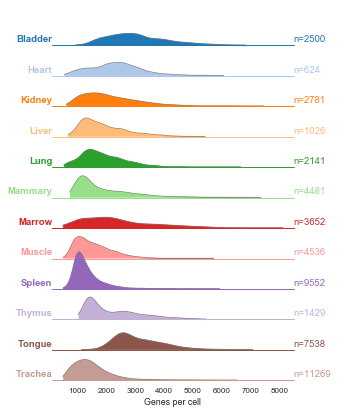

In [10]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')

for ax in g.axes.flatten():    
    # Add white gridlines
#     xticks = ax.get_xticks()
#     xmin, xmax, ymin, ymax = ax.axis()
#     ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
#     ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)


g.savefig('figure1g_horizonplot_genes_per_cell.pdf', bbox_inches='tight')